### Interpreting Pima Diabetes Prediction with Eli5,Shap,LIME
+ SHAP(SHapley Additive exPlanations) :break down a prediction to show the impact of each feature.

In [2]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [3]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [4]:
# Load Viz Pkgs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Labels For Columns/Header
+ Pregnancies::Number of times pregnant
+ Glucose::Plasma glucose concentration a 2 hours in an oral glucose tolerance test
+ BloodPressure::Diastolic blood pressure (mm Hg)
+ SkinThickness::Triceps skin fold thickness (mm)
+ Insulin::2-Hour serum insulin (mu U/ml)
+ BMI::Body mass index (weight in kg/(height in m)^2)
+ DiabetesPedigree::FunctionDiabetes pedigree function
+ Age::Age (years)
+ Outcome::Class variable (0 or 1) 268 of 768 are 1, the others are 0 (0 No DM, 1 has DM)

In [5]:
names = ["Num_of_Preg","Glucose_Conc","BP","Skin_Thickness","TwoHour_Insulin","BMI","DM_Pedigree","Age","Class"]

In [6]:
# Load Dataset
df = pd.read_csv("pima-indians-diabetes.csv",names=names)

In [7]:
df.head()

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

In [10]:
# Check For Missing Values
df.isna().sum()

Num_of_Preg        0
Glucose_Conc       0
BP                 0
Skin_Thickness     0
TwoHour_Insulin    0
BMI                0
DM_Pedigree        0
Age                0
Class              0
dtype: int64

In [11]:
# Data Types
df.dtypes

Num_of_Preg          int64
Glucose_Conc         int64
BP                   int64
Skin_Thickness       int64
TwoHour_Insulin      int64
BMI                float64
DM_Pedigree        float64
Age                  int64
Class                int64
dtype: object

In [15]:
# Check For Occurence of Class
df.groupby('Class').size()

Class
0    500
1    268
dtype: int64

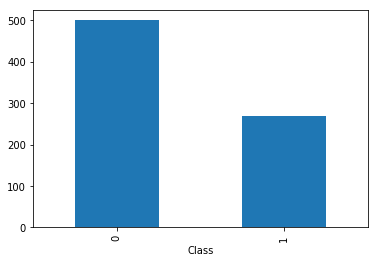

In [16]:
df.groupby('Class').size().plot(kind="bar")

In [17]:
# Check For Correlation Between Xtics/Features
corr = df.corr()

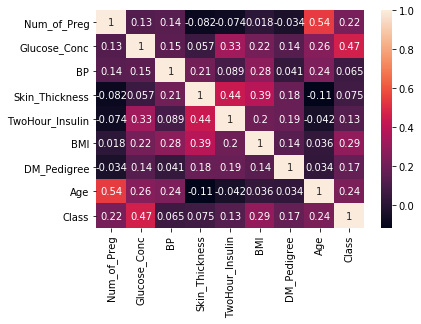

In [18]:
sns.heatmap(corr,annot=True)

### Narrative
+ Fig 1 : There are more patients without DM than with Dm
+ Fig 2: Correlation of various xtics    

In [ ]:
#### Data Viz of Entire Dataset

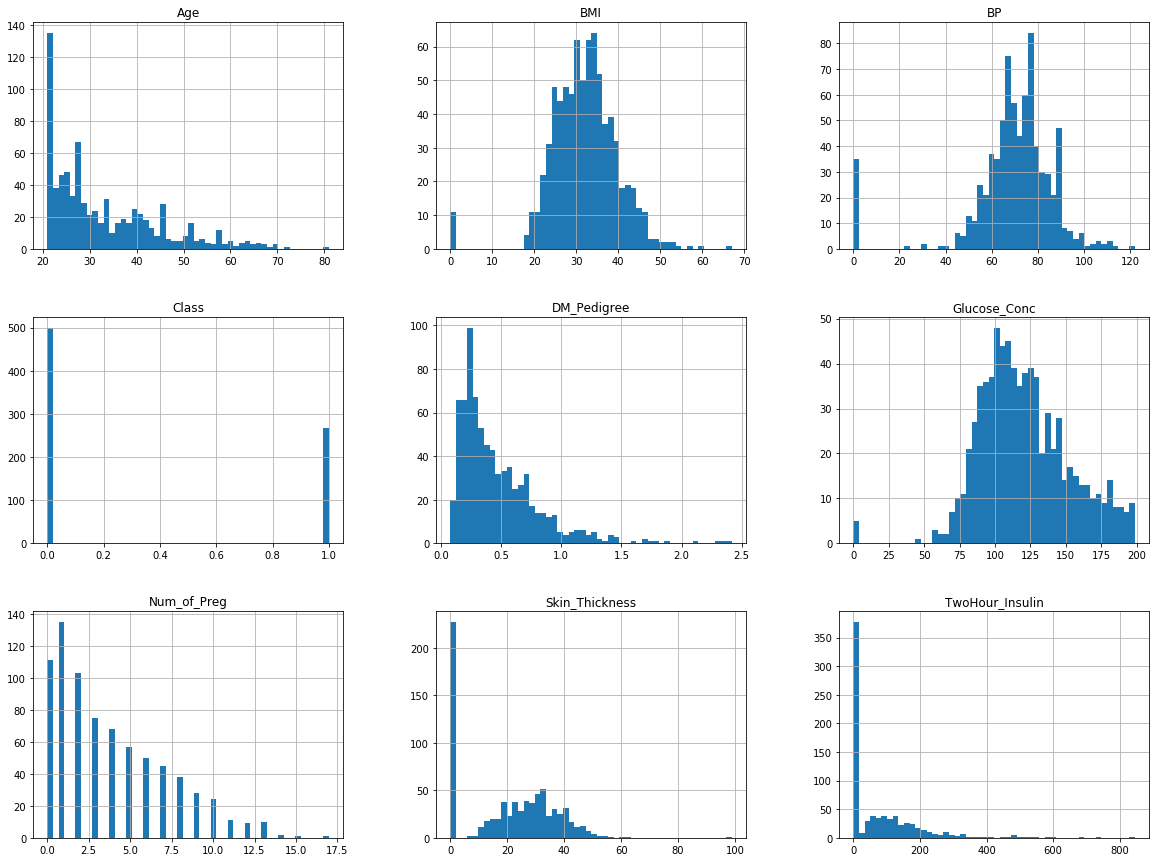

In [19]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [20]:
# Descriptive Analysis Transposed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num_of_Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose_Conc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin_Thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
TwoHour_Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DM_Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
### Data Cleaning 
+ Removing 0 sinces BP and BMI Cant be zero

In [22]:
# Checking For Minimum BP
df['BP'].min()

0

In [23]:
# Checking For Minimum BMI
df['BMI'].min()

0.0

In [24]:
# Replace 0 with Median not Mean
df['BP'] = df['BP'].replace(to_replace=0,value=df['BP'].median())

In [25]:
# Recheck
df['BP'].min()

24

In [31]:
# Replace 0 with Median not Mean
df['BMI'] = df['BMI'].replace(to_replace=0,value=df['BMI'].median())

In [29]:
df['TwoHour_Insulin'].min()

0

In [30]:
df['TwoHour_Insulin'] = df['TwoHour_Insulin'].fillna(df['TwoHour_Insulin'].median())

In [32]:
df['Glucose_Conc'].min()

0

In [33]:
# Replace 0 with Median not Mean
df['Glucose_Conc'] = df['Glucose_Conc'].replace(to_replace=0,value=df['Glucose_Conc'].median())

In [34]:
df['Skin_Thickness'] = df['Skin_Thickness'].fillna(df['Skin_Thickness'].median())

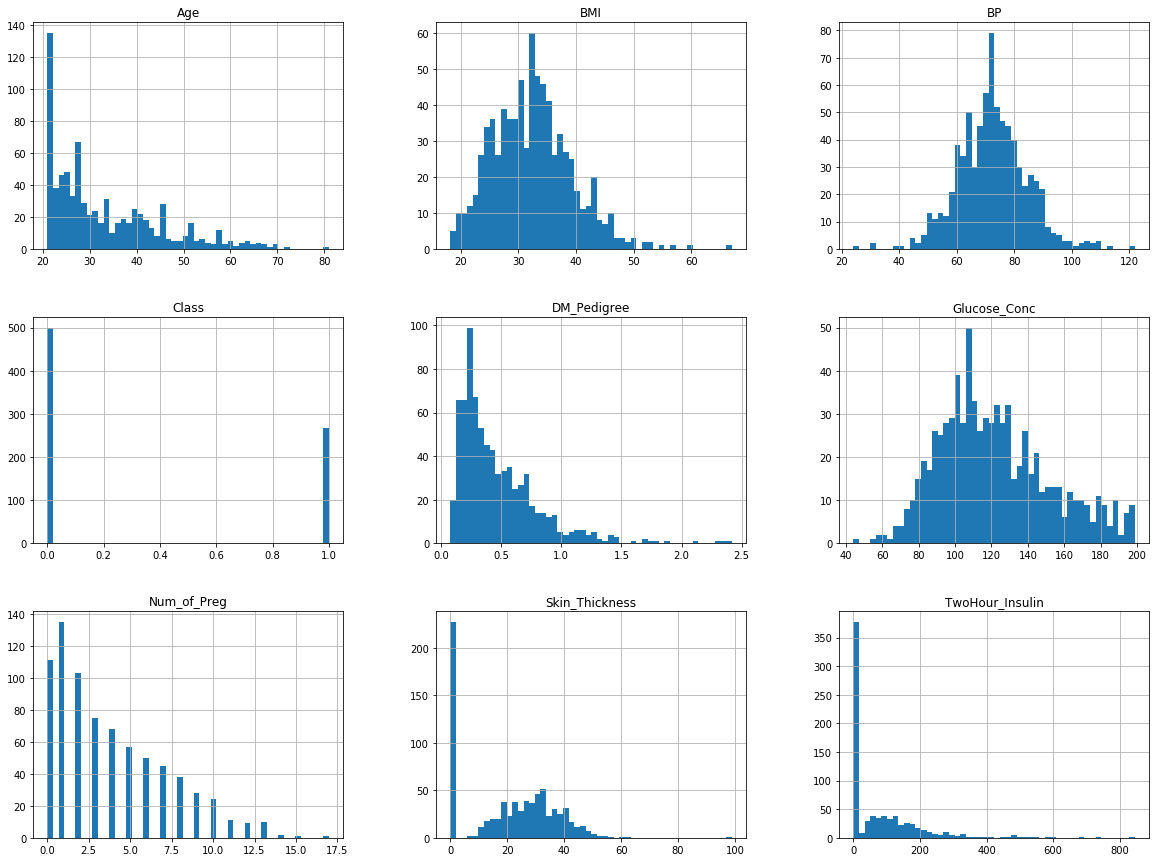

In [35]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [36]:
# Checking For Null Values or NO
import missingno as no

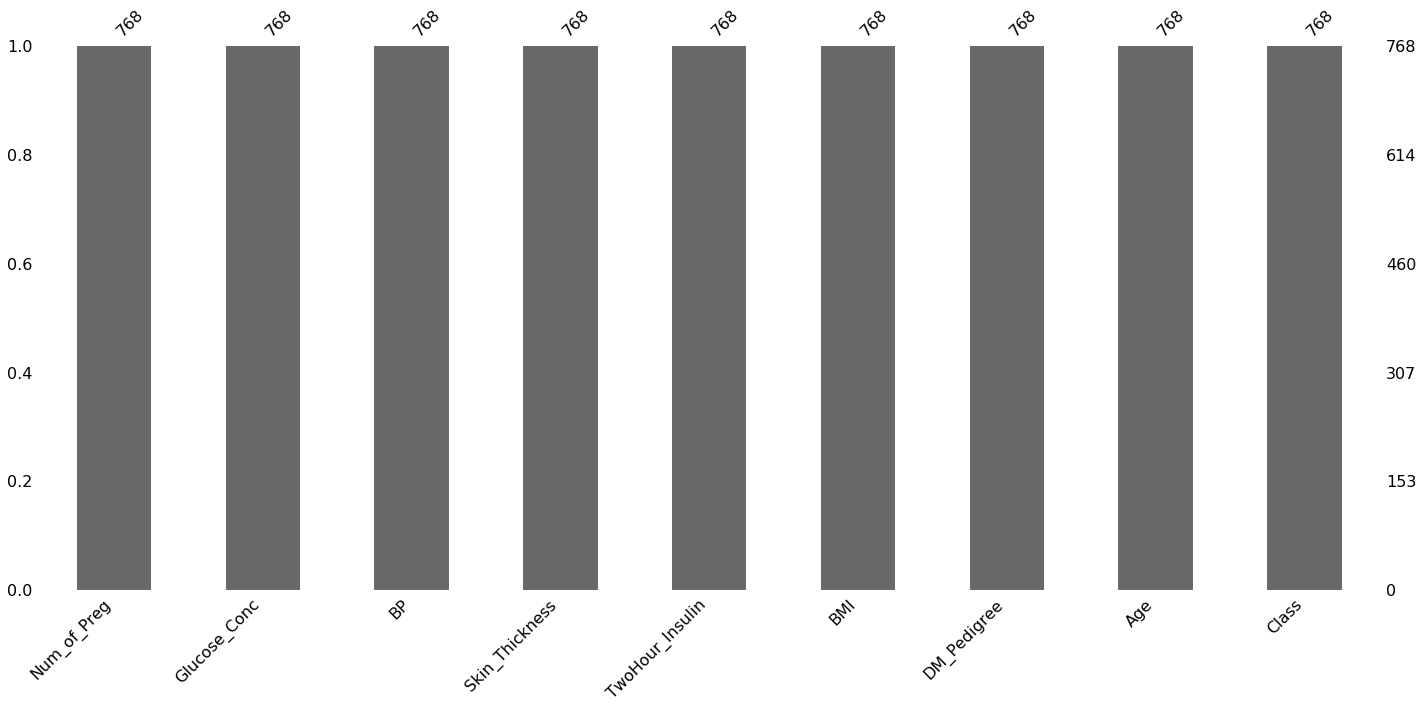

In [37]:
no.bar(df)

#### Feature Prep

In [38]:
df.columns

Index(['Num_of_Preg', 'Glucose_Conc', 'BP', 'Skin_Thickness',
       'TwoHour_Insulin', 'BMI', 'DM_Pedigree', 'Age', 'Class'],
      dtype='object')

In [40]:
df.shape

(768, 9)

In [47]:
df.iloc[:,0:8]

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,72,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,32.0,0.232,54


In [48]:
Xfeatures = df.iloc[:,0:8]

In [49]:
Ylabels = df['Class']

### Scale Our Dataset

In [50]:
from sklearn.preprocessing import MinMaxScaler as Scaler

In [51]:
scaler = Scaler()
X = scaler.fit_transform(Xfeatures)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [52]:
X.shape

(768, 8)

In [55]:
names[0:8]

['Num_of_Preg',
 'Glucose_Conc',
 'BP',
 'Skin_Thickness',
 'TwoHour_Insulin',
 'BMI',
 'DM_Pedigree',
 'Age']

In [57]:
X = pd.DataFrame(X,columns=names[0:8])

In [58]:
X.head()

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age
0,0.352941,0.670968,0.489796,0.353535,0.000000,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.292929,0.000000,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.000000,0.000000,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.232323,0.111111,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.353535,0.198582,0.509202,0.943638,0.200000


#### Split Dataset

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,Ylabels,test_size=0.2,random_state=42)

In [60]:
X_train.shape

(614, 8)

### Building the Models
+ Logistic Regression
+ KNN

In [61]:
# Logit
logit = LogisticRegression()
logit.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
print("Accuracy Score of Logisitic::",logit.score(X_test,y_test))

Accuracy Score of Logisitic:: 0.7727272727272727


In [64]:
X_test.values[0]

array([0.35294118, 0.3483871 , 0.34693878, 0.33333333, 0.22458629,
       0.32310838, 0.15029889, 0.36666667])

In [67]:
# Prediction on A Single Sample
logit.predict(np.array(X_test.values[0]).reshape(1,-1))

array([0])

### Interpreting Models
+ Shap
+ LIME
+ Eli5

#### SHAP explainers
+ TreeExplainer :: XGBoost/LightGBM/CatBoost/scikit-learn models
        - shap.TreeExplainer(model)
+ DeepExplainer:: For Deep learning models eg (TensorFlow/Keras models)
        - shap.DeepExplainer(model, background/sample)
+ GradientExplainer:: Deep learning models eg (TensorFlow/Keras/PyTorch models)
        - shap.GradientExplainer((model.layers[7].input, model.layers[-1].output),map2layer(X, 7),local_smoothing=0 # std dev of smoothing noise)
+ KernelExplainer :: Model agnostic (explains any function),slow,gives an approximation
        - shap.KernelExplainer(svm.predict_proba, X_train, link="logit")

In [68]:
# Load ML Interpreting Models
import shap

In [69]:
# Initialize JS For Plot
shap.initjs()

In [70]:
explainer = shap.KernelExplainer(logit.predict_proba, X_train)

Using 614 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


In [71]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/154 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/usr/local/lib/python3.6/dist-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  1%|          | 1/154 [00:05<14:29,  5.68s/it]/usr/local/lib/python3.6/dist-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprec

In [72]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

#### Narrative
+ Red :: Features that push the prediction to the base line
+ Blue :: Features that pull the prediction lower from the base line      
+ NB:: You can check for individual features and compare each feature with the other

### Summary of All Effect of All Features
+ Using shap.summary_plot()

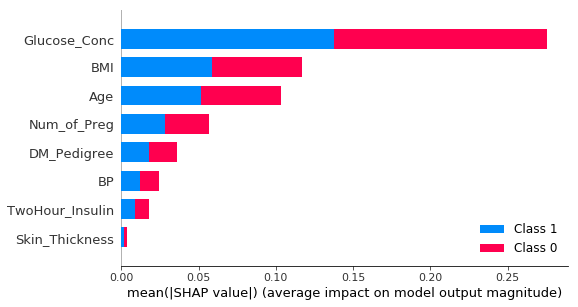

In [73]:
shap.summary_plot(shap_values,X_test)

### Dependency Plot
+ Shows the effect a single feature has on the prediction
+ How much the prediction depends on a particular feature
+ shap.dependence_plot(indexoffeature,matrix_shap_values,dataset_matrix)

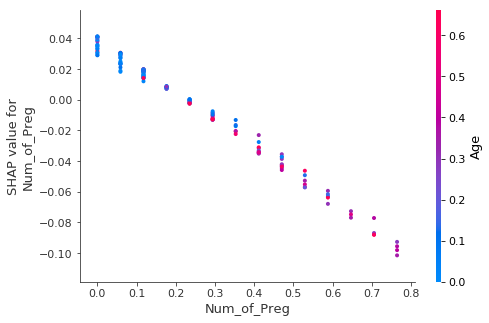

In [76]:
shap.dependence_plot(0,shap_values[0], X_test)

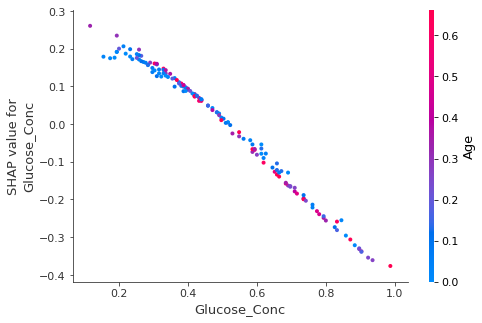

In [77]:
# Glucose Concentration
shap.dependence_plot(1,shap_values[0], X_test)

#### Using LIME(Local Interpretable Model Agnostic Explainer)
+ Data
+ Model
+ Class Names/Feature Names
+ Prediction Function

In [78]:
# Load our pkgs
import lime
import lime.lime_tabular

In [80]:
Ylabels.unique()

array([1, 0])

In [99]:
class_names = ['Non Diabetes','Diabetes']

In [100]:
df.columns

Index(['Num_of_Preg', 'Glucose_Conc', 'BP', 'Skin_Thickness',
       'TwoHour_Insulin', 'BMI', 'DM_Pedigree', 'Age', 'Class'],
      dtype='object')

In [83]:
feature_names = ['Num_of_Preg', 'Glucose_Conc', 'BP', 'Skin_Thickness',
       'TwoHour_Insulin', 'BMI', 'DM_Pedigree', 'Age']

In [101]:
# Create our Explainer ,a Tabular Explainer since it is a tabular data
explainer1 = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=class_names, discretize_continuous=True)

In [102]:
# Sample We Predicted 
X_test.iloc[0]

Num_of_Preg        0.352941
Glucose_Conc       0.348387
BP                 0.346939
Skin_Thickness     0.333333
TwoHour_Insulin    0.224586
BMI                0.323108
DM_Pedigree        0.150299
Age                0.366667
Name: 668, dtype: float64

In [103]:
# The Explainer Instance
exp1 = explainer1.explain_instance(X_test.iloc[0],logit.predict_proba,num_features=8,top_labels=1)

In [104]:
# Show in notebook
exp1.show_in_notebook(show_table=True, show_all=False)


### Using Eli5
+ Explain Like  I am 5

In [94]:
import eli5

In [105]:
# Showing the Weight for our model
eli5.show_weights(logit,top=10)

Weight?,Feature
+3.841,x1
+2.872,x5
+1.526,x7
+0.898,x6
+0.857,x0
-0.061,x3
-0.433,x4
-0.716,x2
-3.721,<BIAS>


In [106]:
# Clearly Define Feature Names
eli5.show_weights(logit,feature_names=feature_names,target_names = class_names)

Weight?,Feature
+3.841,Glucose_Conc
+2.872,BMI
+1.526,Age
+0.898,DM_Pedigree
+0.857,Num_of_Preg
-0.061,Skin_Thickness
-0.433,TwoHour_Insulin
-0.716,BP
-3.721,<BIAS>


#### Narrative

    + Now it shows the feature names alongside their weight
    + How each feature contribute to influence the prediction
    + Bias means an intercept
    + Bias is the intercept where our line intercepts the y-axis for (linear regression). In ML we can call intercepts bias.
    + Bias offsets all predictions that we make.



In [107]:
# Show Explaination For A Single Prediction
eli5.show_prediction(logit, X_test.iloc[0],feature_names=feature_names,target_names=class_names)

#### Conclusion
+ Each of the various libraries has their own method of interpreting the model
+ Each was able to explain why our selected prediction was non-DM

In [108]:
### Thanks 
## Jesus Saves @JCharisTech
## Jesse E.Agbe(JCharis)
## J-Secur1ty